In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy import sparse
import cell2location

/home/zyy/miniconda3/envs/cell2location/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/zyy/miniconda3/envs/cell2location/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [3]:
adata_ref = sc.read_h5ad(r"/home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/adata_total_without_Others.h5ad")
adata_ref

AnnData object with n_obs × n_vars = 223764 × 5000
    obs: 'sample', 'Processing', 'genotype', 'scrublet_score', 'Group', 'Binary Stage', 'Stage', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_outlier', 'outlier', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'minor_celltype', 'anno_celltype'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Binary Stage_colors', 'Stage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'anno_celltype_colors', 'dataset_colors', 'dendr

In [4]:
print(adata_ref.obs.minor_celltype.value_counts())

minor_celltype
RPL10_Stromal       70571
CILP_Stromal        56643
Sec_Pre_Glands      16505
Sec_S100P_Glands    15795
Lumen               14114
Pericyte             8002
Pro_Stromal          5403
CD8_T                5310
Ciliated             4057
Ven_SELE_ECs         3657
Ven_COL4A1_ECs       3488
ITGAX_NK             3132
CD160_NK             2907
Pro_Glands           2417
CD4_T                2340
Mac                  2181
Art_ECs              1711
Ven_CLU_ECs          1367
Mono                 1008
SMC                   890
FCGR3A_NK             709
B                     646
DC                    591
Cycling_T             320
Name: count, dtype: int64


In [5]:
print(adata_ref.obs.anno_celltype.value_counts())

anno_celltype
Stromal         132617
Epithelium       52888
Endothelium      10223
Pericyte          8002
T cell            7970
NK                6748
Myeloid_cell      3780
SMC                890
B                  646
Name: count, dtype: int64


In [6]:
print(adata_ref.obs.major_celltype.value_counts())

major_celltype
Stromal       141509
Epi            52888
Lymphocyte     19144
Endo           10223
Name: count, dtype: int64


In [7]:
adata_ref.layers["counts"].max()

46151.0

In [8]:
# 将 counts 层的数据赋值到 X 中
adata_ref.X = adata_ref.layers["counts"].copy()

In [9]:
adata_ref.X.max()

46151.0

In [10]:
adata_ref.write_h5ad("Integrate/scRNA_ref.h5ad")

In [11]:
ovary_adata_sc = sc.read_h5ad("Integrate/scRNA_ref.h5ad")
ovary_adata_sc

AnnData object with n_obs × n_vars = 223764 × 5000
    obs: 'sample', 'Processing', 'genotype', 'scrublet_score', 'Group', 'Binary Stage', 'Stage', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_outlier', 'outlier', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'minor_celltype', 'anno_celltype'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Binary Stage_colors', 'Stage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'anno_celltype_colors', 'dataset_colors', 'dendr

In [12]:
ovary_adata_sc.obs['genotype'].value_counts()

genotype
A13             14338
SAMN15049048    14232
GSM6605439      10704
ES345           10058
APS-3           10031
APS-1            9530
SAMN15049049     8596
FX1146           8578
SAMN15049047     7784
GSM6605437       7357
E1               7005
APS-2            6789
Ctrl-7           6597
GSM6605440       6128
RIF-3            5917
GSM6605438       5455
A70              5158
APS-4            5132
RIF-6            5076
RIF-2            4955
RIF-1            4682
Ctrl-1           4648
Ctrl-3           4396
Ctrl-2           4380
RIF-4            4263
C03              4251
E3               4167
SAMN15049044     3764
SAMN15049046     3670
SAMN15049043     3585
A30              3456
RIF-5            3077
SAMN15049051     2831
E2               2394
Ctrl-6           2366
SAMN15049042     2322
SAMN15049050     2110
Ctrl-4           1441
Ctrl-5           1198
FX1119           1082
SE03              141
SE02              120
Name: count, dtype: int64

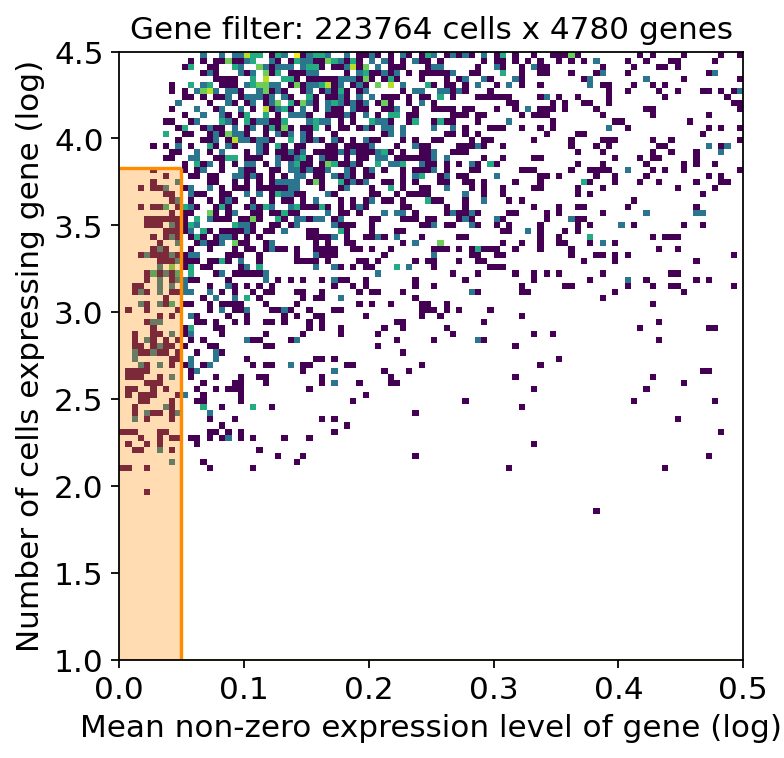

In [13]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(ovary_adata_sc, 
                        cell_count_cutoff=5, 
                        cell_percentage_cutoff2=0.03, 
                        nonz_mean_cutoff=1.12)
# %notebook filter the object
ovary_adata_sc = ovary_adata_sc[:, selected].copy()

In [14]:
# prepare anndata for the regression model
import cell2location
cell2location.models.RegressionModel.setup_anndata(adata=ovary_adata_sc,
                        # 10X reaction / sample / batch
                        batch_key='genotype',
                        # cell type, covariate used for constructing signatures
                        labels_key='minor_celltype')

In [15]:
from cell2location.models import RegressionModel
mod = RegressionModel(ovary_adata_sc)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.3.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'genotype',
│   'labels_key': 'minor_celltype',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   42   │
│         n_cells          │ 223764 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   24   │
│          n_vars          │  4780  │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃  Categories  ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['genotype'] │     A13      │          0          │
│                       │     A30      │          1          │
│                       │     A70      │          2          │
│                       │    APS-1     │          3          │
│                       │    APS-2     │          4          │
│                       │    APS-3     │          5          │
│                       │    APS-4     │          6          │
│                       │     C03      │          7          │
│                       │    Ctrl-1    │          8          │
│                       │    Ctrl-2    │          9          │
│                       │    Ctrl-3    │         10          │
│                       │    Ctrl-4    │         11          │
│                       │    Ctrl-5    │         12          │
│                       │    Ctrl-6    │         13          │
│                       │    Ctrl-7    │         14          │
│                       │      E1      │         15          │
│                       │      E2      │         16          │
│                       │      E3      │         17          │
│                       │    ES345     │         18          │
│                       │    FX1119    │         19          │
│                       │    FX1146    │         20          │
│                       │  GSM6605437  │         21          │
│                       │  GSM6605438  │         22          │
│                       │  GSM6605439  │         23          │
│                       │  GSM6605440  │         24          │
│                       │    RIF-1     │         25          │
│                       │    RIF-2     │         26          │
│                       │    RIF-3     │         27          │
│                       │    RIF-4     │         28          │
│                       │    RIF-5     │         29          │
│                       │    RIF-6     │         30          │
│                       │ SAMN15049042 │         31          │
│                       │ SAMN15049043 │         32          │
│                       │ SAMN15049044 │         33          │
│                       │ SAMN15049046 │         34          │
│                       │ SAMN15049047 │         35          │
│                       │ SAMN15049048 │         36          │
│                       │ SAMN15049049 │         37          │
│                       │ SAMN15049050 │         38          │
│                       │ SAMN15049051 │         39          │
│                       │     SE02     │         40          │
│                       │     SE03     │         41          │
└───────────────────────┴──────────────┴─────────────────────┘

                         labels State Registry                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location       ┃    Categories    ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['minor_celltype'] │  RPL10_Stromal   │          0          │
│                             │   CILP_Stromal   │          1          │
│                             │   Pro_Stromal    │          2          │
│                             │ Sec_S100P_Glands │          3          │
│                             │  Sec_Pre_Glands  │          4          │
│                             │    Pro_Glands    │          5          │
│                             │      Lumen       │          6          │
│                             │     Ciliated     │          7          │
│                             │   Ven_SELE_ECs   │          8          │
│                             │  Ven_COL4A1_ECs  │          9          │
│                             │   Ven_CLU_ECs    │         10          │
│                             │     Art_ECs      │         11          │
│                             │     Pericyte     │         12          │
│                             │       SMC        │         13          │
│                             │      CD8_T       │         14          │
│                             │      CD4_T       │         15          │
│                             │    Cycling_T     │         16          │
│                             │     ITGAX_NK     │         17          │
│                             │     CD160_NK     │         18          │
│                             │    FCGR3A_NK     │         19          │
│                             │       Mac        │         20          │
│                             │       Mono       │         21          │
│                             │        DC        │         22          │
│                             │        B         │         23          │
└─────────────────────────────┴──────────────────┴─────────────────────┘

In [16]:
mod.train(max_epochs=100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/zyy/miniconda3/envs/cell2location/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/zyy/miniconda3/envs/cell2location/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to

Training:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


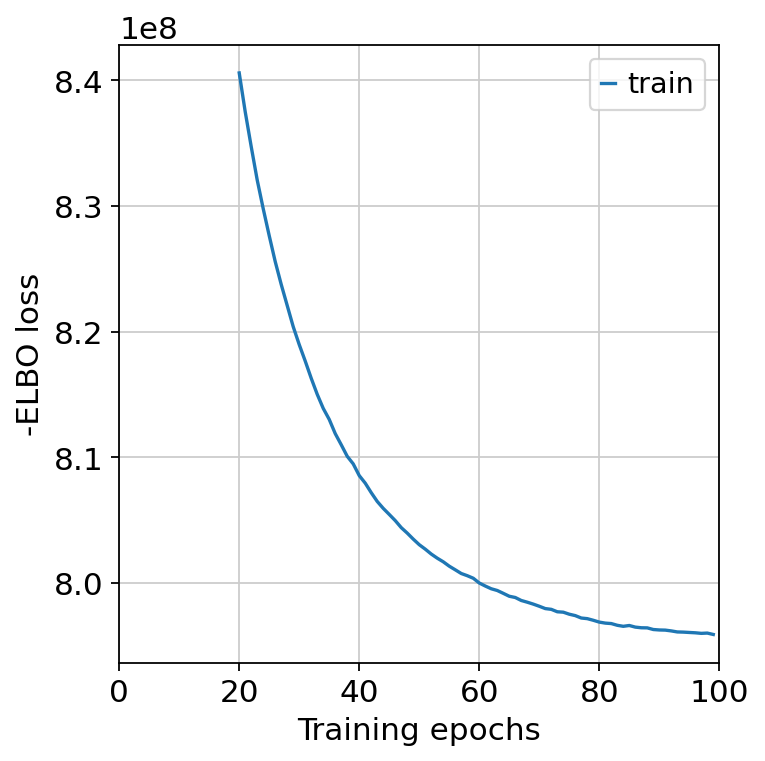

In [19]:
mod.plot_history(20)

In [18]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
ovary_adata_sc = mod.export_posterior(
    ovary_adata_sc, sample_kwargs={'num_samples': 1000, 'batch_size': 2500}
)
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# If the model has a `.to(device)` method, move it to GPU
# mod.to(device)
# Save model
mod.save("./pyobjs/ovary_cell2location_sc_ref_mod_celltype_minor", overwrite=True)

# Save anndata object with results
ovary_adata_sc.write("./pyobjs/ovary_cell2location_sc_ref_celltype_minor.h5ad")

Sampling local variables, batch:   0%|          | 0/90 [00:00<?, ?it/s]

Sampling global variables, sample:   0%|          | 0/999 [00:00<?, ?it/s]